In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import anaclass

### lets play with the toy data (only 30 realizations)

In [3]:
example = anaclass.Realizations("../../data/40_cross_host_8/", 1e8)

In [4]:
example.grab_mass("acc", Nhalo=32000) # grabbing only the relevant mass values!

example.grab_mass("acc_surv", Nhalo=32000)

example.grab_mass("surv", Nhalo=32000)

number of realizations: 40
number of branches/subhalos: 32000
../../data/40_cross_host_8/tree_0_evo.npz


/Users/jsmonzon/Research/SatGen/notebooks/../src/anaclass.py:15: RuntimeWarning: All-NaN slice encountered
  ana_mass = np.nanmax(mass, axis=1) #finding the maximum mass


saving to numpy files to the same directory
number of realizations: 40
number of branches/subhalos: 32000
saving to numpy files to the same directory
number of realizations: 40
number of branches/subhalos: 32000
saving to numpy files to the same directory


In [12]:
file = "../../data/40_cross_host_8/tree_0_evo.npz"

In [51]:

tree = np.load(file)
mass = tree["mass"]
redshift = tree["redshift"]
mass = np.delete(mass, 1, axis=0) #there is some weird bug for this index
mask = mass != -99. # converting to NaN values
mass = np.where(mask, mass, np.nan)  


In [52]:
mass.shape

(8799, 354)

In [23]:

test = []
for i in mass:
    test.append(mass.shape[1]-sum(np.isnan(i)))

In [53]:
test = np.sum(np.isnan(mass),axis=1)
ind = np.where(test==mass.shape[1])[0]

mass = np.delete(mass, ind, axis=0)

In [54]:
mass.shape

(8798, 354)

In [55]:
ana_mass = np.nanmax(mass, axis=1) #finding the maximum mass
ana_index = np.nanargmax(mass, axis=1)
ana_redshift = redshift[ana_index]



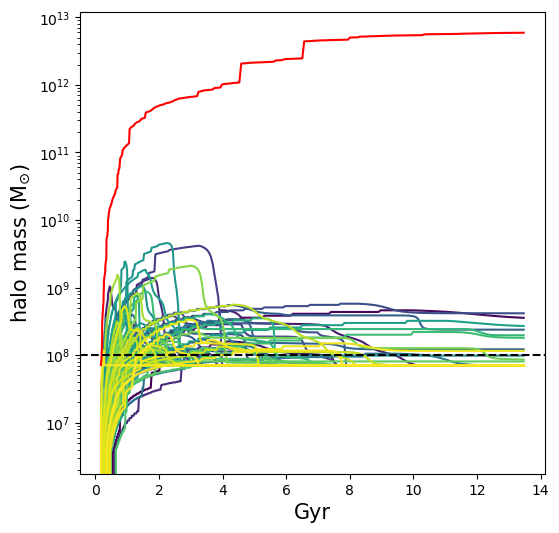

In [5]:
example.plot_single_realization("../../data/40_cross_host_8/tree_0_evo.npz", nhalo=100)

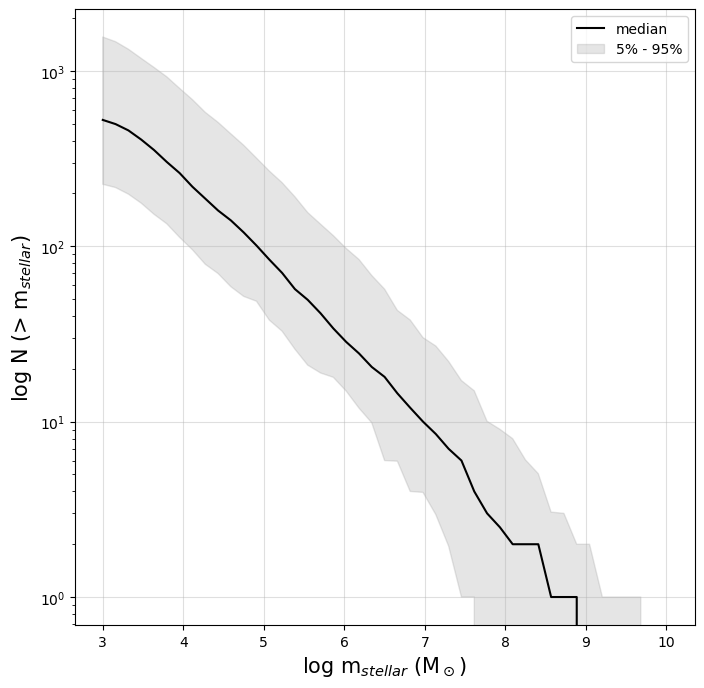

In [6]:
massmat = anaclass.MassMat("../../data/40_cross_host_8/acc_surv_mass.npy") # plotting several different mass functions

massmat.prep_data()

massmat.CSMF()

massmat.plot_CSMF()

/Users/jsmonzon/Research/SatGen/notebooks/../src/anaclass.py:200: RuntimeWarning: invalid value encountered in log10
  lgMh = np.log10(Mh)
/Users/jsmonzon/Research/SatGen/notebooks/../src/anaclass.py:213: RuntimeWarning: invalid value encountered in log10
  self.phi = np.log10(Mh/Mhost)


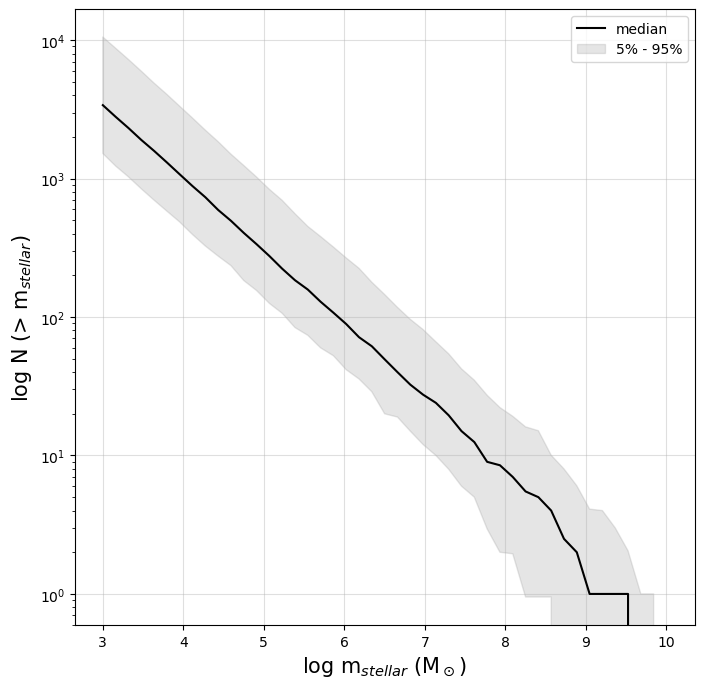

In [8]:
massmat = anaclass.MassMat("../../data/40_cross_host_8/acc_mass.npy")

massmat.prep_data()

massmat.CSMF()

massmat.plot_CSMF()

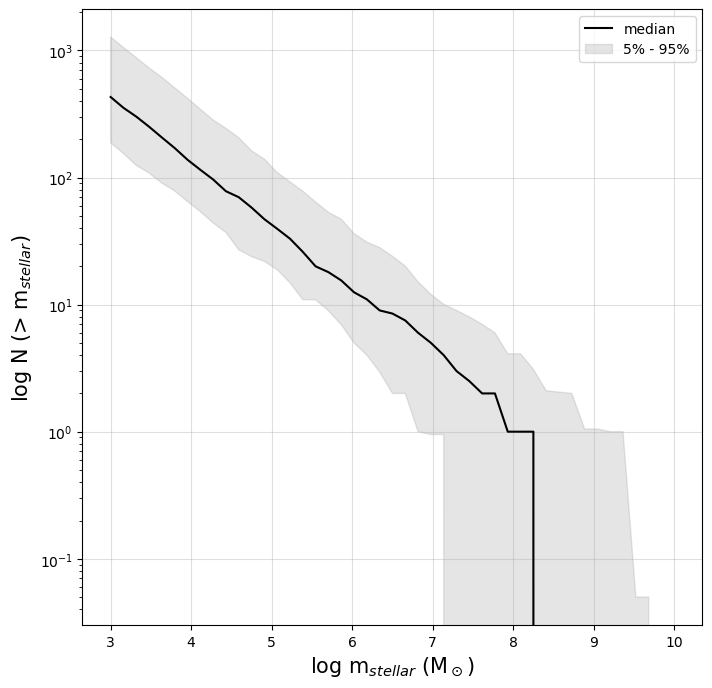

In [9]:
massmat = anaclass.MassMat("../../data/40_cross_host_8/surv_mass.npy")

massmat.prep_data()

massmat.CSMF()

massmat.plot_CSMF()